## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports


In [2]:
import itertools

import numpy as np

# from matplotlib import pyplot as plt
!pip install -U matplotlib~=3.5.3
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.transforms as mtransforms

import pandas as pd

import seaborn as sns
!pip install statannot
from statannot import add_stat_annotation


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import data

In [3]:
path = '/content/drive/MyDrive/python_colab/barplots/dataset'
pd.options.display.max_columns = None
#ppr = pd.read_excel(path+'/protein_phosphorylation.xlsx') ; # protein phosphorylation
data_A = pd.read_excel(path+'/protein_phosphorylation.xlsx') ; # protein phosphorylation
# dna_alt= pd.read_excel(path+'/dna_alteration.xlsx') ; # dna alteration
data_B = pd.read_excel(path+'/dna_alteration.xlsx') ; # dna alteration
#protein_lipid = pd.read_excel(path+'/protein_lipid.xlsx') ; # protein lipid
data_C = pd.read_excel(path+'/protein_lipid.xlsx') ; # protein lipid




## Function to plot setting

In [4]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [5]:
def pre_param_plot(ref_data,ref_axes,ref_pallete,ref_y_label,ref_title,ref_word,ref_word_position_x,ref_word_position_y,ref_y_lim,ref_width_bar):
  # https://icolorpalette.com/color-palette-generator/536307
  g = sns.barplot(ax=ref_axes,
              data=ref_data,
              capsize=.07,
              ci = "sd",
              errwidth=0.98,
              linewidth=1.8, 
              errcolor=".02", 
              edgecolor=".1",
              palette=ref_pallete
              )
  ref_axes.set_ylabel(ref_y_label)
  ref_axes.set_title(ref_title,fontsize = 12,fontweight="bold")

  g.set(ylim=ref_y_lim)

  ref_axes.tick_params(direction='out', length=3, width=2, colors='k',
               grid_color='k', grid_alpha=0.5)
  g.tick_params(labelsize=10)

  ref_axes.text(ref_word_position_x,ref_word_position_y, ref_word,fontsize=14, fontweight='bold', va='top')
  
  change_width(ref_axes, ref_width_bar)
  return g

## Function statistic annotation

In [6]:
def param_statistic_annotation(ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_height_diff,ref_sns_barplot):
    # statistical annotation
    x1, x2 = ref_group_A, ref_group_B
    y, h, col = ref_height_diff, 1, 'k'

    # insert into axis
    ref_axes.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c=col)
    ref_axes.text((x1+x2)*ref_position_an, y+h, ref_stat_diff, ha='center', va='bottom',fontweight = 'bold',fontsize=14, color=col)
    
    for bar in ref_sns_barplot.patches:
          bar.set_zorder(3)

    plt.tight_layout()

In [7]:
def get_maximum(data_a, data_b):
     
    if data_a >= data_b:
        c_data = data_a
        return c_data
    else:
        c_data = data_b
        return c_data

def get_min(data_a, data_b):
     
    if data_a <= data_b:
        c_data = data_a
        return c_data
    else:
        c_data = data_b
        return c_data

def param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot):
    # statistical annotation
    A = ref_max_group_a
    B = ref_max_group_b
    yref=get_maximum(A,B)

    yrefb=get_min(A,B)

    # ref_max_group_a = ref_data['G0'].max()
    # ref_max_group_b = ref_data['G150'].max()
    ya = ref_max_group_a*1.01
    yb = ref_max_group_b*1.01

    ref_axes.plot([ref_group_A, ref_group_A], [ya, yref*ref_height_pairwise], lw=1.2, c='k')
    ref_axes.plot([ref_group_B, ref_group_B], [yb, yref*ref_height_pairwise], lw=1.2, c='k')
    ref_axes.plot([ref_group_A, ref_group_B], [yref*ref_height_pairwise, yref*ref_height_pairwise], lw=1.2, c='k')

    ref_axes.text((ref_group_A+ref_group_B)*ref_position_an, yref*ref_height_pairwise, ref_stat_diff, ha='center', va='bottom',fontweight = 'bold',fontsize=14, color='k')
    
    for bar in ref_sns_barplot.patches:
          bar.set_zorder(3)

    # plt.tight_layout()



## Independent Parameters

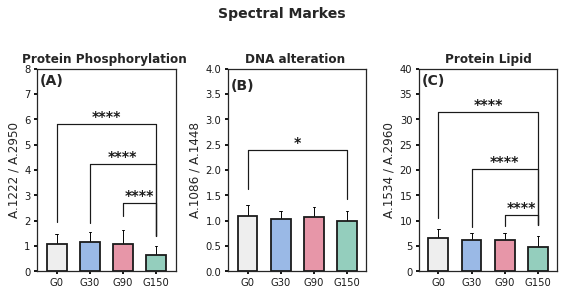

In [8]:
## Independent Parameter
# https://www.schemecolor.com/always-a-joke.php
# https://icolorpalette.com/color-palette-generator/536307
# https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php

ref_pallete = ['#EEEEEE','#8DB6F3','#f489a0','#8BD7C1']
ref_width_bar = .6
ref_word_position_x = -.5

plt.rcParams["font.family"] = "Times New Roman"

hue = "color"
sns.set(style="ticks")

fig, axes = plt.subplots(1,3, figsize=(8, 4), sharey=False)

fig.suptitle('Spectral Markes', y=1.02,fontsize = 14,fontweight="bold")

"""
Protein Phosphorylation 
"""
ref_data = data_A
ref_axes = axes[0]

ref_y_label = "A.1222 / A.2950"
ref_title = "Protein Phosphorylation "
ref_word = '(A)'
ref_word_position_y =  7.8
ref_y_lim = (0, 8)

g = pre_param_plot(ref_data,ref_axes,ref_pallete,ref_y_label,ref_title,ref_word,ref_word_position_x,ref_word_position_y,ref_y_lim,ref_width_bar)

ref_sns_barplot = g
ref_position_an = .5

## G0 vs G150 : ****
ref_group_A = 0
ref_group_B = 3
ref_stat_diff = "****"
ref_height_pairwise = 3
ref_max_group_a = ref_data['G0'].max()
ref_max_group_b = ref_data['G150'].max()

param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot)

## G30 vs G150 : ****
ref_group_A = 1
ref_group_B = 3
ref_height_pairwise = 2.25
ref_max_group_a = ref_data['G30'].max()
ref_max_group_b = ref_data['G150'].max()

param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot)

## G90 vs G150 : ****
ref_group_A = 2
ref_group_B = 3
ref_height_pairwise = 1.25
ref_max_group_a = ref_data['G90'].max()
ref_max_group_b = ref_data['G150'].max()

param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot)

"""
DNA Alteration  
"""
ref_data = data_B
ref_axes = axes[1]

ref_y_label = "A.1086 / A.1448"
ref_title = "DNA alteration "
ref_word = '(B)'
ref_word_position_y =  3.8
ref_y_lim = (0, 4)

g = pre_param_plot(ref_data,ref_axes,ref_pallete,ref_y_label,ref_title,ref_word,ref_word_position_x,ref_word_position_y,ref_y_lim,ref_width_bar)

ref_sns_barplot = g
ref_position_an = .5

## G0 vs G150 : ****
ref_group_A = 0
ref_group_B = 3
ref_stat_diff = "*"
ref_height_pairwise = 1.5
ref_max_group_a = ref_data['G0'].max()
ref_max_group_b = ref_data['G150'].max()

param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot)

"""
Protein Lipid  
"""

# possible alternative https://stackoverflow.com/questions/46917425/how-to-order-seaborn-pointplot
ref_data = data_C
ref_axes = axes[2]

ref_y_label = "A.1534 / A.2960"
ref_title = "Protein Lipid"
ref_word = '(C)'
ref_word_position_y =  39
ref_y_lim = (0, 40)

g = pre_param_plot(ref_data,ref_axes,ref_pallete,ref_y_label,ref_title,ref_word,ref_word_position_x,ref_word_position_y,ref_y_lim,ref_width_bar)

ref_sns_barplot = g
ref_position_an = .5

## G0 vs G150 : ****
ref_group_A = 0
ref_group_B = 3
ref_stat_diff = "****"
ref_height_pairwise = 3
ref_max_group_a = ref_data['G0'].max()
ref_max_group_b = ref_data['G150'].max()

param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot)

## G30 vs G150 : ****
ref_group_A = 1
ref_group_B = 3
ref_height_pairwise = 2.25
ref_max_group_a = ref_data['G30'].max()
ref_max_group_b = ref_data['G150'].max()

param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot)

## G90 vs G150 : ****
ref_group_A = 2
ref_group_B = 3
ref_height_pairwise = 1.25
ref_max_group_a = ref_data['G90'].max()
ref_max_group_b = ref_data['G150'].max()

param_statistic_annotation_alternative(ref_height_pairwise,ref_max_group_a,ref_max_group_b,ref_group_A,ref_group_B,ref_axes,ref_position_an,ref_stat_diff,ref_sns_barplot)

fig.tight_layout()
